<h1 align="center"> Computation for Scientists </h1>
<h2 align="center"> <em> Solving Linear Equations</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Systems of Linear Equations
- Most of the numerical problems are reduced to solving a system of linear equations,
$$\mathbf{A} \boldsymbol{x} 
=\begin{bmatrix}
a_{00} & a_{01} & \cdots & a_{0,n_1} \\
a_{10} & a_{11} & \cdots & a_{1,n_1} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1}
\end{bmatrix}\begin{bmatrix}
x_0 \\ x_1 \\ \vdots \\ x_{n-1}
\end{bmatrix}
= \begin{bmatrix}
b_0 \\ b_1 \\ \vdots \\ b_{m-1}
\end{bmatrix}
= \boldsymbol{b}.$$
- For $\mathbf{A}\in\mathbb{R}^{m\times n}$, the solution exists if $\boldsymbol{b}\in\mathrm{span}(\mathbf{A})=\{\mathbf{A}\boldsymbol{x}: \boldsymbol{x}\in\mathbb{R}^n\}$.
- If $m=n$, the solution exists and is unique if $\mathbf{A}$ is _nonsingular_, which implies that $\mathbf{A}^{-1}$ exists, $\det(\mathbf{A})\neq0$, $\mathbf{A}$ has rank $n$, and $\mathbf{A}\boldsymbol{z}\neq\mathbf{0}$ for any nonzero vector $\boldsymbol{z}$.

- The [`linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) module in SciPy (and NumPy) provides the linear algebra tools for solving linear equations.

In [90]:
import numpy as np
import scipy.linalg as la
from numpy.random import rand
n = 100 # problem size
A = rand(n, n) # random nxn matrix
x = rand(n) # true solution
b = A @ x # same as np.dot(A, x)

x1 = la.inv(A) @ b # x = A^-1 b
x2 = la.solve(A, b) # solve x from linear eqs
print('||x1-x|| = ', la.norm(x1-x)) # absolute error
print('||x2-x|| = ', la.norm(x2-x))

||x1-x|| =  4.1926891583631e-13
||x2-x|| =  1.699176264859793e-13


- Solving linear equations directly and inverting the matrix, which is faster? 

In [91]:
%timeit la.inv(A) @ b

184 µs ± 4.73 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [92]:
%timeit la.solve(A, b)

108 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Gassian Elimination
- The basic technique of solving $\mathbf{A}\boldsymbol{x}=\boldsymbol{b}$ is called _Gaussian elimination_. In the first step, one uses a series of matrices $\mathbf{M}^{(k)}$ to make $\mathbf{A}$ upper triangular:
$$\mathbf{M}^{(n-2)}\cdots\mathbf{M}^{(0)} \mathbf{A}
=\mathbf{U}
=\begin{bmatrix} u_{00} & u_{01} & \cdots & u_{0,n-1} \\
0 & u_{11} & \cdots & u_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & u_{n-1,n-1}\end{bmatrix}.$$

- In the second step, one solves $\mathbf{U}\boldsymbol{x}=\boldsymbol{y} =\mathbf{M}^{(n-2)}\cdots\mathbf{M}^{(0)}\boldsymbol{b}$ with _backward substitution_:
$$x_i = \begin{cases}
y_{n-1}/u_{n-1,n-1} & \quad\mathrm{if}\, i=n-1, \\
\left(y_i - \sum_{j=i+1}^{n-1}u_{ij}x_j\right)u_{ii}^{-1} & \quad\mathrm{otherwise}.
\end{cases}$$

- Let $\mathbf{A}^{(k)}=\mathbf{M}^{(k-1)}\cdots\mathbf{M}^{(0)} \mathbf{A}$. Then
$\mathbf{M}^{(k)} = \mathbf{1}-\boldsymbol{m}^{(k)}\boldsymbol{e}_k^T$ annhilates the elements of the $k$th column vector of $\mathbf{A}^{(k)}$ below $a^{(k)}_{kk}$, where $a^{(k)}_{kk}$ is called the _pivot_, and
$$\boldsymbol{m}^{(k)} 
=\begin{bmatrix}
m^{(k)}_0 \\ \vdots \\ m^{(k)}_k \\ m^{(k)}_{k+1} \\ \vdots \\ m^{(k)}_{n-1}
\end{bmatrix}
= \begin{bmatrix}
0 \\ \vdots \\ 0  \\ a^{(k)}_{k+1,k}/a^{(k)}_{k,k} \\ \vdots \\ a^{(k)}_{n-1,k}/a^{(k)}_{k,k}
\end{bmatrix}.$$

- It can be shown that
\begin{align*}
\mathbf{L} &= (\mathbf{M}^{(k-1)}\cdots\mathbf{M}^{(0)})^{-1}
= \mathbf{1} + \sum_{k=0}^{n-2}\boldsymbol{m}^{(k)}\boldsymbol{e}_k^T\\
& = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
l_{10} & 1 & \cdots &0 \\
\vdots & \vdots & \ddots & \vdots \\
l_{n-1,0} & l_{n-1,1} & \cdots & 1
\end{bmatrix}
\end{align*}
is lower triangular. Therefore, 
$$\mathbf{A}=\mathbf{L}\mathbf{U}.$$ 
This is known as the _LU factorization_.

- Explicit LU factorization is useful when many linear systems with the same $\mathbf{A}$ but different $\boldsymbol{b}$'s are to be solved.
- Given the LU factorization of $\mathbf{A}$, the first step of Gassian elimination can be achieved by solving $\mathbf{L}\boldsymbol{y}=\boldsymbol{b}$ with _forward substitution_:
$$y_i = \begin{cases}
b_0 & \quad\mathrm{if}\, i=0, \\
b_i - \sum_{j=0}^{i-1}l_{ij}y_j & \quad\mathrm{otherwise}.
\end{cases}$$

- Gassian elimination breaks down if the pivot $a^{(k)}_{kk}$ is 0. This can be fixed by permuting the rows of $\mathbf{A}^{(k)}$, which is known as (partial) pivoting.

- Gaussian elimination becomes more stable when the largest pivot is chosen at each step.

- $\mathbf{A}$ is singular if there is no nonzero pivot, but the LU factorization can still be completed.

In [93]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
lu, piv = la.lu_factor(A) # LU factorization with pivoting
b1 = np.array([1, 1, 1, 1])
b2 = np.array([1, 2, 3, 4])
x1 = la.lu_solve((lu, piv), b1) # solve with LU and pivoting
x2 = la.lu_solve((lu, piv), b2)
la.norm(A @ x1 - b1), la.norm(A @ x2 - b2)

(2.220446049250313e-16, 3.66205343881779e-15)

- More efficient algorithms may be implemented if $\mathbf{A}$ has some special properties. (Check the documentation of [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html).)
    - Symmetric: $\mathbf{A}=\mathbf{A}^T$
    - Positive definite: $\mathbf{x}^T\mathbf{A}\mathbf{x}>0$ for all $\mathbf{x}\neq\mathbf{0}$
    - Banded: $a_{ij}=0$ if $|i-j|>\beta$, where $\beta$ is the bandwidth
    - Sparse: most $a_{ij}$ are 0.

- For example, _Cholesky factorization_ can be performed if $\mathbf{A}$ is symmetric and positive definite: $\mathbf{A}=\mathbf{L}\mathbf{L}^T$, where $\mathbf{L}$ is a lower triagnular matrix with positive diagonal entries.

# Linear Least Squares
- The linear system $\mathbf{A}\mathbf{x}=\mathbf{y}$ is _overdetermined_ if the size of vector $\mathbf{y}$ is larger than the size of vector $\mathbf{x}$.

- The _least squares_ solution $\mathbf{x}$ to $\mathbf{A}\mathbf{x}\simeq\mathbf{y}$ minimizes the 2-norm of the residual vector $\mathbf{r}=\mathbf{y}-\mathbf{A}\mathbf{x}$.

- Least squares can be used to fit function $f(t, \mathbf{x}) = \sum_{i=0}^{n-1} x_i \phi_i(t)$ to data $(t_i, y_i)$ ($i=0,1,\ldots,m-1$) by minimizing the 2-norm of:
$$\mathbf{r}
=\begin{bmatrix}y_0 \\ y_1 \\ \vdots \end{bmatrix}
-\begin{bmatrix}
\phi_0(t_0) & \phi_1(t_0) & \cdots \\
\phi_0(t_1) & \phi_1(t_1) & \cdots \\
\vdots & \vdots & \ddots\end{bmatrix}
\begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
.$$

- SciPy provides [`linalg.lstsq()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq) to find the least squares solution.

In [94]:
m = 20 # number of data points
t = np.linspace(0, 10, m) # m points in [0, 10]
y = 1 + 2*t + t**2 + (rand(m)-0.5) # noisy data points

In [95]:
phi = lambda z, n: z**n # basis function
n = 3 # number of fitting parameters
A = np.empty((m, n)) # construct the matrix for a polynomial fit
for i in range(n):
    A[:,i] = phi(t, i)
x, *_ = la.lstsq(A, y) # *_ catches the rest of the tuple

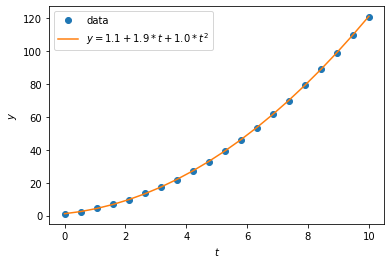

In [96]:
import matplotlib.pyplot as plt

plt.plot(t, y, 'o', label='data') # plot data points
f = lambda z: x[0]*phi(z,0) + x[1]*phi(z,1) + x[2]*phi(z,2) # fitting function
plt.plot(t, f(t), label=f'$y={x[0]:.1f}+{x[1]:.1f}* t+{x[2]:.1f}* t^2$')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()

# QR Factorization

- In QR factorization, 
$$\mathbf{A}= \mathbf{Q}\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}
=\begin{bmatrix}\mathbf{Q}_1\ \mathbf{Q_2}\end{bmatrix}
\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix} = \mathbf{Q}_1\mathbf{R},$$
where $\mathbf{Q}$ is a $m\times m$ orthogonal matrix ($\mathbf{Q}^T\mathbf{Q}=\mathbf{1}$), and $\mathbf{R}$ is a $n\times n$ upper triangular matrix.
The column vectors of $\mathbf{Q}_1$ form the orthonormal basis of $\mathrm{span}(\mathbf{A})$, and those of $\mathbf{Q}_2$ are the rest of the orthonormal basis vectors of $\mathbb{R}^m$ that are orthogonal to $\mathrm{span}(\mathbf{A})$.

- With the QR factorization, the linear least squares problem becomes
$$\mathbf{Q}^T\mathbf{A}\mathbf{x} 
= \begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}\mathbf{x}
\simeq \begin{bmatrix}\mathbf{z}_1\\ \mathbf{z}_2\end{bmatrix}
= \mathbf{Q}^T \mathbf{y}.$$
The least squares solution $\mathbf{x}$ can be solved from $\mathbf{R}\mathbf{x}=\mathbf{z}_1 = \mathbf{Q}_1^T y$ by backward substitution.

- Explicity QR factorization can be formed using [`scipy.linalg.qr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html#scipy.linalg.qr) if several least squares problems with the same matrix $\mathbf{A}$ need to be solved.

In [97]:
Q1, R = la.qr(A, mode='economic') # Q1(m,n) and R(n,n)
x2 = la.solve_triangular(R, Q1.T @ y) # R is upper triangular
print("least squares: x = ", x)
print("explicity QR: x = ", x2)

least squares: x =  [1.14192603 1.93239496 1.0071455 ]
explicity QR: x =  [1.14192603 1.93239496 1.0071455 ]


# Singular Value Decomposition (SVD)
- Because a real $m\times n$ matrix $\mathbf{A}$ maps an arbitrary vector $\mathbb{R}^n$ to a vector in $\mathbb{R}^m$, it can be decomposed as
$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma}\mathbf{V}^T
= \sum_{i=0}^{n-1}\sigma_i \mathbf{u}_i\mathbf{v}_i^T,$$
where $\mathbf{u}_i$ and $\mathbf{v}_i$ are the column vectors of the $m\times m$ orthogonal matrix $\mathbf{U}$ and the $n\times n$ orthogonal matrix $\mathbf{V}$, respectively, and $\mathbf{\Sigma}$ is a $m\times n$ diagonal matrix, and its diagonal entries
$$\sigma_0\geq \sigma_1 \geq \cdots \geq \sigma_{n-1}\geq 0$$
are called the _singular values_ of $\mathbf{A}$.

- $\mathrm{rank}(\mathbf{A}) = $ number of nonzero singular values.
    
- The _minimum norm solution_ to $\mathbf{A}\mathbf{x}\simeq \mathbf{y}$ is given by
$$\mathbf{x}=\sum_{i=0}^{k-1} \sigma_i^{-1}\, (\mathbf{u}_i^T\cdot\mathbf{y})\,\mathbf{v}_i,$$
where $k$ is the number of nonzero singular values of $\mathbf{A}$. In practice, small signular values can be dropped from the summation for more stability. (What does say about the fitting function?)

- SVD is generally more robust than the QR factorization, but is much more expensive.

- [`scipy.linalg.svd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd) performs the SVD decomposition.

In [98]:
U, s, Vt = la.svd(A)
print(U.shape, s.shape, Vt.shape)
print("Singular values: ", s)
# compute the least squares solution using SVD
x3 = np.zeros(n) 
smin = 1e-5*s[0] # minimum signular value to include
for i in range(n):
    if s[i] < smin: break
    x3 += ((U[:,i] @ y) / s[i]) * Vt[i,:]

print("least squares: x = ", x)
print("SVD: x = ", x3)

(20, 20) (3,) (3, 3)
Singular values:  [209.35260067   6.98334195   1.52382865]
least squares: x =  [1.14192603 1.93239496 1.0071455 ]
SVD: x =  [1.14192603 1.93239496 1.0071455 ]


# Reading
- Read the relevant sections of Chapter 5 in [Numerical Python : Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.oreilly.com/library/view/numerical-python/9781484242469/).

# Coding
- Implement a function to compute the inverse of an arbitrary square matrix using  `lu_factor()` and `lu_solve()` in `scipy.linalg`. Document and validate the function. (Hint: For $\mathbf{A}\mathbf{X}=\mathbf{1}$, you can treat $\mathbf{X}$ and $\mathbf{1}$ as collections of column vectors. `numpy.eye(n)` returns a $n\times n$ identity matrix.)

- The _pseudoinverse_ of a $m\times n$ real matrix $\mathbf{A}$ can be written as
$$\mathbf{A}^+ = \mathbf{V}\mathbf{\Sigma}^+\mathbf{U}^T,$$
where $\mathbf{\Sigma}^+$ is a $n\times m$ diagonal matrix with the first $k$ diagonal values being $1/\sigma_i$ ($\sigma_i\neq0)$ and the rest being 0. Write a function to compute the pseudoinverse of an arbitrary real matrix. Validate that it produces the inverse of a nonsingular square matrix. Show how it may be used to solve the least squares problem. You may find `numpy.outer()` useful.

In [295]:
import numpy as np
  
# 1st argument --> numbers ranging from 0 to 9, 
# 2nd argument, row = 3, col = 3
B = np.random.randint(10, size=(3, 3))  
print(B)


[[0 9 8]
 [1 3 1]
 [7 8 7]]


In [296]:
b=np.random.randint(10, size=(3))  #generating an array using rand

In [297]:
P,L,U=la.lu(B)

In [298]:
print(P) #permuation matrix

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [299]:
print(L) #lower triangular matrix

[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.14285714 0.20634921 1.        ]]


In [300]:
print(U) #upper triangular matrix

[[ 7.          8.          7.        ]
 [ 0.          9.          8.        ]
 [ 0.          0.         -1.65079365]]


In [301]:
print(L@U)

[[7. 8. 7.]
 [0. 9. 8.]
 [1. 3. 1.]]


In [302]:
L = np.dot(P,L) 
L_inv = la.inv(L)
U_inv = la.inv(U)
B_inv = np.dot(U_inv,L_inv)

In [303]:
print(B_inv)

[[-1.25000000e-01 -9.61538462e-03  1.44230769e-01]
 [-1.38777878e-17  5.38461538e-01 -7.69230769e-02]
 [ 1.25000000e-01 -6.05769231e-01  8.65384615e-02]]


SVD: $B=UdV^{T}$

In [304]:
U, d, VT = la.svd(B) #SVD 

In [305]:
U

array([[-0.67175804,  0.73233789,  0.11145559],
       [-0.18125087, -0.01660822, -0.98329664],
       [-0.71825431, -0.68073885,  0.14389359]])

In [306]:
d

array([17.06760597,  5.02243754,  1.21323851])

In [307]:
VT

array([[-0.30519987, -0.72274984, -0.62006912],
       [-0.95208354,  0.21808248,  0.21442238],
       [ 0.01974753, -0.65579929,  0.75467697]])

Pseudoinverse $A^{+}=Vd^{+}U^{T}$

In [308]:
d=np.diag(d)  #to create s^+ first we invert non zeros values of s 
              # to do we diagonalize s and then invert S and then we take the transpose of the resulting matrix.
              #however it can be done in a single step  with inverting S because it is diagonal

In [309]:
dinv=la.inv(d)

In [310]:
dinv

array([[ 0.05859053,  0.        , -0.        ],
       [ 0.        ,  0.19910651, -0.        ],
       [ 0.        ,  0.        ,  0.82424024]])

In [311]:
B_pseudoinv=np.dot(VT.T,np.dot(dinv,U.T))  #pseudoinverse A^+=Vs^+U^T

In [312]:
B_pseudoinv

array([[-1.25000000e-01, -9.61538462e-03,  1.44230769e-01],
       [-6.93889390e-18,  5.38461538e-01, -7.69230769e-02],
       [ 1.25000000e-01, -6.05769231e-01,  8.65384615e-02]])

In [313]:
pseudoinverse_B=la.pinv(B)  #checking with python bulit library

In [314]:

pseudoinverse_B

array([[-1.25000000e-01, -9.61538462e-03,  1.44230769e-01],
       [-6.93889390e-18,  5.38461538e-01, -7.69230769e-02],
       [ 1.25000000e-01, -6.05769231e-01,  8.65384615e-02]])